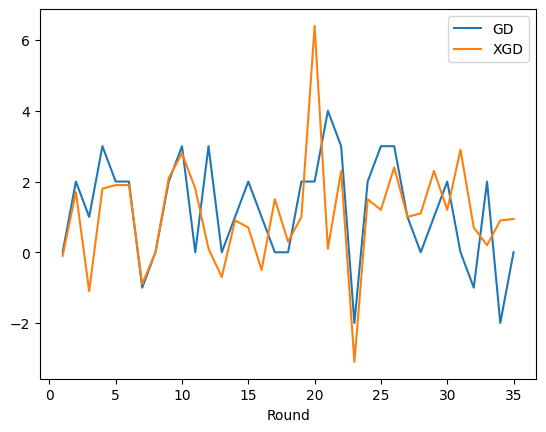

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from highlight_text import fig_text
from PIL import Image
import urllib

# Reading data from a CSV into a pandas DataFrame
df = pd.read_csv(r'liverpoolxg.csv', delimiter=';')

# Extracting data from DataFrame columns into lists
x = list(df['Round'])
y1 = list(df['GD'])
y2 = list(df['XGD'])

# Creating a plot with two y-axes using DataFrame.plot() method
ax = df.plot(x='Round', y=['GD', 'XGD'])

# Setting 'Round' column as the index of DataFrame
df.set_index('Round', inplace=True)

In [6]:
# Calculating 5-game rolling avg for 'GD' and 'XGD' columns and storing results in new columns '5GD' and '5XGD'
df['5GD'] = df.GD.rolling(window = 5, min_periods = 0).mean()
df['5XGD'] = df.XGD.rolling(window = 5, min_periods = 0).mean()
  
# viewing the dataset
print(df.head(35))

       Day Venue Result  GF  GA         Opponent    xG  xGA  GD   XGD  5GD  \
Round                                                                        
1      Sun  Away      D   1   1          Chelsea  1.30  1.4   0 -0.10  0.0   
2      Sat  Home      W   3   1      Bournemouth  3.00  1.3   2  1.70  1.0   
3      Sun  Away      W   2   1    Newcastle Utd  0.90  2.0   1 -1.10  1.0   
4      Sun  Home      W   3   0      Aston Villa  2.50  0.7   3  1.80  1.5   
5      Sat  Away      W   3   1           Wolves  2.50  0.6   2  1.90  1.6   
6      Sun  Home      W   3   1         West Ham  3.00  1.1   2  1.90  2.0   
7      Sat  Away      L   1   2        Tottenham  1.30  2.2  -1 -0.90  1.4   
8      Sun  Away      D   2   2         Brighton  2.30  2.3   0  0.00  1.2   
9      Sat  Home      W   2   0          Everton  2.20  0.1   2  2.10  1.0   
10     Sun  Home      W   3   0  Nott'ham Forest  3.20  0.4   3  2.80  1.2   
11     Sun  Away      D   1   1       Luton Town  2.60  0.8   0 

(-0.5, 191.5, 191.5, -0.5)

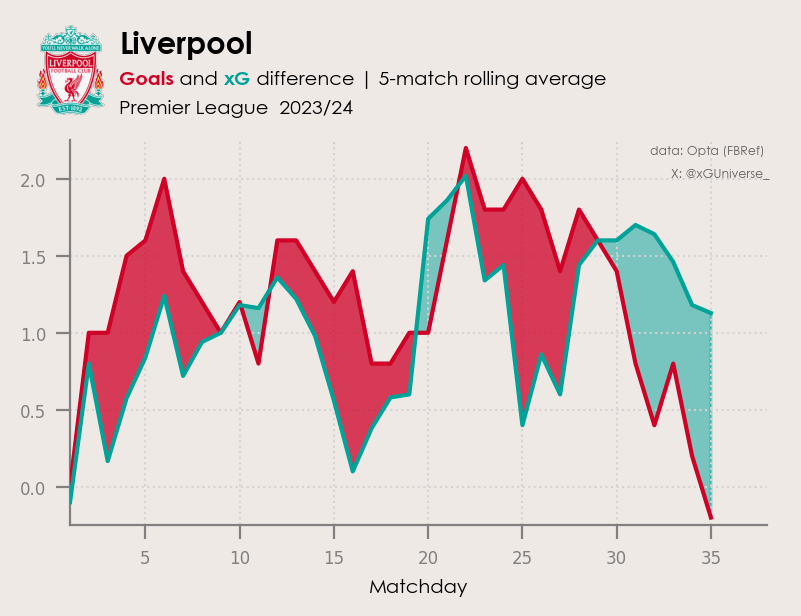

In [7]:
fig = plt.figure(figsize=(4.5, 2.5), dpi = 200, facecolor = "#EFE9E6")
ax = plt.subplot(111, facecolor = "#EFE9E6")

# Remove top & right spines and change the color.
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")
plt.xlabel('Matchday', font = "Century Gothic", color = "black", size = 7)

# Set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

line_1 = ax.plot(df.index, df['5GD'], color = "#d00027", zorder = 4)
line_2 = ax.plot(df.index, df['5XGD'], color = "#00a398", zorder = 4)

ax.set_xlim(1, 38)
ax.set_ylim(-0.25, 2.25)

# Fill the area between the lines
ax.fill_between(
    df.index,
    df['5GD'],
    df['5XGD'],
    where=df['5GD'] >= df['5XGD'],  # Condition for filling
    interpolate = True,
    color = "#d00027",
    alpha = 0.75,  # Transparency level
    zorder = 3
)

ax.fill_between(
    df.index,
    df['5GD'],
    df['5XGD'],
    where=df['5XGD'] >= df['5GD'],  # Condition for filling
    interpolate=True,
    color = "#00a398",
    alpha=0.5
)

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)

# Set x-axis major tick positions to only 19 game multiples.
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
# Set y-axis major tick positions to only 0.5 xG multiples.
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# Title and subtitle for the legend
fig_text(
    x = 0.18, y = 1.1,
    s = "Liverpool",
    color = "black",
    family = "Century Gothic",
    weight = "bold",
    size = 11,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.18, y = 1.02,
    s = "<Goals> and <xG> difference | 5-match rolling average\nPremier League  2023/24",
    highlight_textprops = [
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"}
    ],
    color = "black",
    size = 7,
    family = "Century Gothic",
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.77, y = 0.87,
    s = "data: Opta (FBRef)\n      X: @xGUniverse_",
    color = "#636061",
    size = 4.5,
    ha = "left",
    va = "top",
    family = "Century Gothic",
    annotationbbox_kw={"xycoords": "figure fraction"}
)

#Setting logo
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([0.035, 0.93, 0.18, 0.18], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}8650.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

#plt.savefig('liverpool.png', dpi=1200, bbox_inches = 'tight')

(-0.5, 191.5, 191.5, -0.5)

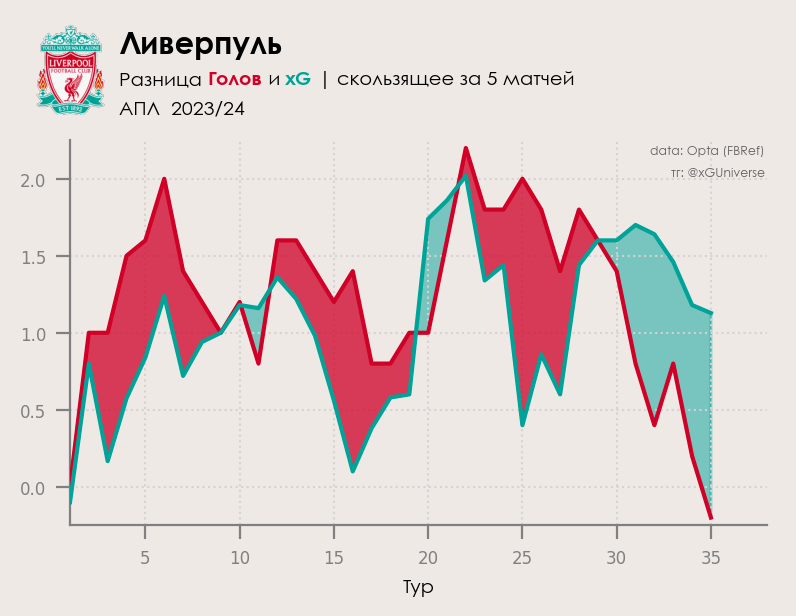

In [8]:
fig = plt.figure(figsize=(4.5, 2.5), dpi = 200, facecolor = "#EFE9E6")
ax = plt.subplot(111, facecolor = "#EFE9E6")

# Remove top & right spines and change the color.
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")
plt.xlabel('Тур', font = "Century Gothic", color = "black", size = 7)

# Set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

line_1 = ax.plot(df.index, df['5GD'], color = "#d00027", zorder = 4)
line_2 = ax.plot(df.index, df['5XGD'], color = "#00a398", zorder = 4)

ax.set_xlim(1, 38)
ax.set_ylim(-0.25, 2.25)

# Fill the area between the lines
ax.fill_between(
    df.index,
    df['5GD'],
    df['5XGD'],
    where=df['5GD'] >= df['5XGD'],  # Condition for filling
    interpolate = True,
    color = "#d00027",
    alpha = 0.75,
    zorder = 3
)

ax.fill_between(
    df.index,
    df['5GD'],
    df['5XGD'],
    where=df['5XGD'] >= df['5GD'],  # Condition for filling
    interpolate=True,
    color = "#00a398",
    alpha=0.5  # Transparency level
)
# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)

# Set x-axis major tick positions to only 19 game multiples.
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
# Set y-axis major tick positions to only 0.5 xG multiples.
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# Title and subtitle for the legend
fig_text(
    x = 0.18, y = 1.1,
    s = "Ливерпуль",
    color = "black",
    family = "Century Gothic",
    weight = "bold",
    size = 11,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.18, y = 1.02,
    s = "Разница <Голов> и <xG> | скользящее за 5 матчей\nАПЛ  2023/24",
    highlight_textprops = [
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"}
    ],
    color = "black",
    size = 7,
    family = "Century Gothic",
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.77, y = 0.87,
    s = "data: Opta (FBRef)\n      тг: @xGUniverse",
    color = "#636061",
    size = 4.5,
    ha = "left",
    va = "top",
    family = "Century Gothic",
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([0.035, 0.93, 0.18, 0.18], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}8650.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

#plt.savefig('liverpoolru.png', dpi=1200, bbox_inches = 'tight')